In [25]:
# Linear regression using the normal equation

import numpy as np

X = 2 * np.random.rand(100, 1)
Y= 4 + 3*X + np.random.randn(100, 1)


Text(0, 0.5, '$y$')

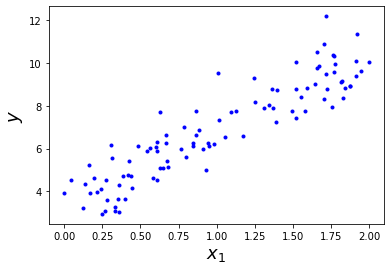

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt


plt.plot(X,Y, 'b.')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18)

In [10]:
X_b = np.c_[np.ones((100,1)), X]

theta_b = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y)

In [11]:
# Best parameters

theta_b

array([[3.41274938],
       [3.45611143]])

In [14]:
# Predicting values using the new parameters using Normal Equation!

X_new = np.array([[0], [2]])

X_new_b = np.c_[np.ones((2, 1)), X_new]

y_predict = X_new_b.dot(theta_b)

y_predict

array([[ 3.41274938],
       [10.32497225]])

<ipython-input-21-4e2fce57f3d9>:3: MatplotlibDeprecationWarning: Unrecognized location 'bottom left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  plt.legend(loc ='bottom left')


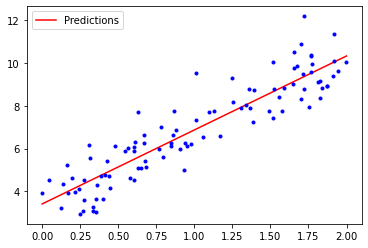

In [21]:
plt.plot(X_new,y_predict, 'r-', label = 'Predictions')
plt.plot(X,Y, 'b.')
plt.legend(loc ='bottom left')

In [22]:
#Predictions using sklearn!


from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

linreg.fit(X,Y)

LinearRegression()

In [23]:
linreg.intercept_, linreg.coef_

(array([3.41274938]), array([[3.45611143]]))

In [26]:
linreg.predict(X_new)

array([[ 3.41274938],
       [10.32497225]])

In [29]:
# Trying the same using the equation for Batch Gradient Descent!

eta = 0.1 # learning rate
Iter =1000
m =100

theta = np.random.rand(2,1) # random initialization

for i in range(Iter):
    
    gradient = 2/m * X_b.T.dot(X_b.dot(theta) -Y)
    theta = theta - eta*gradient

In [30]:
theta

array([[6.12230044],
       [0.74617418]])

In [32]:
#Final output Y

X_new_b.dot(theta)

array([[6.12230044],
       [7.6146488 ]])

In [37]:
#Stochastic Gradient Descent!

n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index =np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = Y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients


In [38]:
theta # almost same as batch gradient descent!

array([[6.13323577],
       [0.68924636]])

In [39]:
#Trying out the same using SGDRegressor

from sklearn.linear_model import SGDRegressor

SGD_reg = SGDRegressor(max_iter =1000,tol=1e-3, penalty=None, eta0=0.1, random_state=42)
SGD_reg.fit(X,Y.ravel())

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [40]:
SGD_reg.intercept_, SGD_reg.coef_

(array([4.14362803]), array([2.9162832]))

In [45]:
#Polynomial Regression!

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

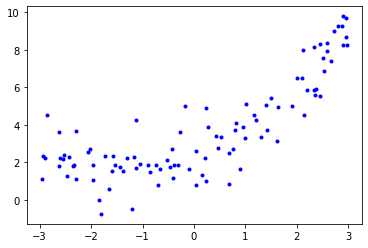

In [47]:
plt.plot(X,y,'b.')# graph for polynomial data

In [49]:
# Now process this data by adding powers of each features to the training set!

from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2,include_bias =False)
X_poly = poly_features.fit_transform(X)

In [50]:
X[0]

array([0.02956032])

In [51]:
X_poly[0]

array([0.02956032, 0.00087381])

In [53]:
Y[0]

array([6.69093876])

In [52]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.248562]), array([[1.0374945 , 0.40403716]]))

In [57]:
y_new =lin_reg.predict(X_poly)

In [58]:
y_new[0]

array([2.27958372])

In [59]:
#Regularizing Linear Models! - to reduce overfitting, by reducing the number of degrees of freedom and also polynomial degrees

# Ridge Regression

X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5

In [60]:
from sklearn.linear_model import Ridge

ridge_reg= Ridge(alpha =1,solver = 'cholesky')
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[1.79112258]])

In [61]:
SGD_reg1 = SGDRegressor(penalty ='l2') # Same as a ridge regressor!
SGD_reg1.fit(X,y.ravel())
SGD_reg1.predict([[1.5]])

array([1.74849033])

In [62]:
# LASSO Regression

from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.78434061])

In [63]:
#ElasticNet Regression

from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.78622243])

In [69]:
#Early Stopping


from sklearn.model_selection import train_test_split

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)



from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from copy import deepcopy

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)